In [1]:
print("Welcome to my EMR Notebook!")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1577403837317_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Welcome to my EMR Notebook!

In [2]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1577403837317_0001,pyspark,idle,Link,Link,✔


In [3]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
jmespath                   0.9.4  
lxml                       4.4.1  
mysqlclient                1.4.4  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pip                        19.3.1 
py-dateutil                2.2    
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
setuptools                 42.0.2 
six                        1.12.0 
soupsieve                  1.9.4  
wheel                      0.33.6 
windmill                   1.6

In [10]:
one = spark.read.csv("s3://aws-logs-708709477996-us-east-2/elasticmapreduce/500_Cities__Local_Data_for_Better_Health__2019_release.csv",header='true')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
one.show(1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------+---------+--------+---------------+----------+----------+-------------------+--------------------+---------------+---------------+----------------+----------+--------------------+---------------------+--------------------------+-------------------+---------------+--------------------+----------+---------+--------+-----------+-------------------+
|Year|StateAbbr|StateDesc|CityName|GeographicLevel|DataSource|  Category|           UniqueID|             Measure|Data_Value_Unit|DataValueTypeID| Data_Value_Type|Data_Value|Low_Confidence_Limit|High_Confidence_Limit|Data_Value_Footnote_Symbol|Data_Value_Footnote|PopulationCount|         GeoLocation|CategoryID|MeasureId|CityFIPS|  TractFIPS|Short_Question_Text|
+----+---------+---------+--------+---------------+----------+----------+-------------------+--------------------+---------------+---------------+----------------+----------+--------------------+---------------------+--------------------------+-------------------+--------

In [6]:
#sc.install_pypi_package("pandas==0.25.1") 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
df.limit(2).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Year StateAbbr StateDesc  ... CityFIPS    TractFIPS     Short_Question_Text
0  2017        GA   Georgia  ...  1369000  13051004002          Annual Checkup
1  2017        HI    Hawaii  ...    15003  15003003101  Coronary Heart Disease

[2 rows x 24 columns]

## Data Preparation
(1.) Changing the columns datatypes

In [12]:
from pyspark.sql.functions import col , column
one=one.withColumn("PopulationCount",one["PopulationCount"].cast("bigint"))
one=one.withColumn("Data_Value",one["Data_Value"].cast("float"))
one=one.withColumn("Low_Confidence_Limit",one["Low_Confidence_Limit"].cast("float"))
one=one.withColumn("High_Confidence_Limit",one["High_Confidence_Limit"].cast("float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
one.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Year: string (nullable = true)
 |-- StateAbbr: string (nullable = true)
 |-- StateDesc: string (nullable = true)
 |-- CityName: string (nullable = true)
 |-- GeographicLevel: string (nullable = true)
 |-- DataSource: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- UniqueID: string (nullable = true)
 |-- Measure: string (nullable = true)
 |-- Data_Value_Unit: string (nullable = true)
 |-- DataValueTypeID: string (nullable = true)
 |-- Data_Value_Type: string (nullable = true)
 |-- Data_Value: float (nullable = true)
 |-- Low_Confidence_Limit: float (nullable = true)
 |-- High_Confidence_Limit: float (nullable = true)
 |-- Data_Value_Footnote_Symbol: string (nullable = true)
 |-- Data_Value_Footnote: string (nullable = true)
 |-- PopulationCount: long (nullable = true)
 |-- GeoLocation: string (nullable = true)
 |-- CategoryID: string (nullable = true)
 |-- MeasureId: string (nullable = true)
 |-- CityFIPS: string (nullable = true)
 |-- TractFIPS: string (

In [14]:
print((one.count(), len(one.columns)))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(810103, 24)

import pandas as pd

## (2.) Checking null values and the NAN values in the dataset

In [16]:
from pyspark.sql.functions import isnan, when, count, col, isnull

# Checking NAN values in the dataset --> None 
one.select([count(when(isnan(c), c)).alias(c) for c in one.columns]).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----+---------+---------+--------+---------------+----------+--------+--------+-------+---------------+---------------+---------------+----------+--------------------+---------------------+--------------------------+-------------------+---------------+-----------+----------+---------+--------+---------+-------------------+
|Year|StateAbbr|StateDesc|CityName|GeographicLevel|DataSource|Category|UniqueID|Measure|Data_Value_Unit|DataValueTypeID|Data_Value_Type|Data_Value|Low_Confidence_Limit|High_Confidence_Limit|Data_Value_Footnote_Symbol|Data_Value_Footnote|PopulationCount|GeoLocation|CategoryID|MeasureId|CityFIPS|TractFIPS|Short_Question_Text|
+----+---------+---------+--------+---------------+----------+--------+--------+-------+---------------+---------------+---------------+----------+--------------------+---------------------+--------------------------+-------------------+---------------+-----------+----------+---------+--------+---------+-------------------+
|   0|        0|      

In [17]:
# Checking NULL values in the dataset --> None 
one.select([count(when(isnull(c), c)).alias(c) for c in one.columns]).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Year  StateAbbr  StateDesc  ...  CityFIPS  TractFIPS  Short_Question_Text
0     0          0          0  ...        56      28056                    0

[1 rows x 24 columns]

#### Saving original 'one' dataframe in two

In [18]:
two = one

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### (3.) Dropping columns and rows which are not required for our analysis and have null values.

#### Dropping columns 'Data_Value_Footnote',  'Data_Value_Footnote_Symbol',  'TractFIPS',  'CityFIPS',  'Geolocation' 

#### And dropping all rows with null values

In [20]:
columns_to_drop = ['Data_Value_Footnote', 'Data_Value_Footnote_Symbol', 'TractFIPS', 'CityFIPS', 'GeoLocation']
two = two.drop(*columns_to_drop)

two = two.na.drop()

# no data value for the tracts with population less than 50
#two = two.where(col("Data_Value").isNotNull())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
two.select([count(when(isnull(c), c)).alias(c) for c in two.columns]).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Year  StateAbbr  StateDesc  ...  CategoryID  MeasureId  Short_Question_Text
0     0          0          0  ...           0          0                    0

[1 rows x 19 columns]

In [41]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Data Exploration

In [42]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

two.createOrReplaceTempView("Viewone")
res1 = spark.sql("select * from Viewone")

res1.limit(2).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Year StateAbbr StateDesc  CityName GeographicLevel DataSource         Category             UniqueID                                                                                 Measure Data_Value_Unit DataValueTypeID   Data_Value_Type  Data_Value  Low_Confidence_Limit  High_Confidence_Limit  PopulationCount CategoryID MeasureId     Short_Question_Text
0  2017        GA   Georgia  Savannah    Census Tract      BRFSS       Prevention  1369000-13051004002  Visits to doctor for routine checkup within the past Year among adults aged >=18 Years               %          CrdPrv  Crude prevalence   74.800003                  74.0                   75.5             3697    PREVENT   CHECKUP          Annual Checkup
1  2017        HI    Hawaii  Honolulu    Census Tract      BRFSS  Health Outcomes          15003003101                                     Coronary heart disease among adults aged >=18 Years               %          CrdPrv  Crude prevalence    4.900000                   4.4      

In [45]:
res4 = spark.sql("select distinct Category from Viewone")
res4.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           Category|
+-------------------+
|Unhealthy Behaviors|
|         Prevention|
|    Health Outcomes|
+-------------------+

### Unhealthy Behavior measures

In [24]:
res5 = spark.sql("select distinct Measure from Viewone where Category = 'Unhealthy Behaviors'")
pd.set_option('display.max_colwidth',200)
res5.limit(10).toPandas()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                          Measure
0                    Current smoking among adults aged >=18 Years
1                     Binge drinking among adults aged >=18 Years
2         Sleeping less than 7 hours among adults aged >=18 Years
3  No leisure-time physical activity among adults aged >=18 Years
4                            Obesity among adults aged >=18 Years

### Prevention measures

In [47]:
res6 = spark.sql("select distinct Measure from Viewone where Category = 'Prevention'")
res6.limit(110).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                                                                                                                                                          Measure
0  Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years
1                                                                                                                                       Papanicolaou smear use among adult women aged 21–65 Years
2                                                                                                          Visits to doctor for routine checkup within the past Year among adults aged >=18 Years
3                                                                                                                                                    Mammography use among women aged 50–74 Years
4                             

### Health Outcomes measures

In [27]:
res7 = spark.sql("select distinct Measure from Viewone where Category = 'Health Outcomes'")
res7.limit(110).toPandas()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                                                                     Measure
0                                Cancer (excluding skin cancer) among adults aged >=18 Years
1                                                     Arthritis among adults aged >=18 Years
2                                                Current asthma among adults aged >=18 Years
3   High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years
4                                        Coronary heart disease among adults aged >=18 Years
5                          Mental health not good for >=14 days among adults aged >=18 Years
6                         Chronic obstructive pulmonary disease among adults aged >=18 Years
7                                        Chronic kidney disease among adults aged >=18 Years
8                                           High blood pressure among adults aged >=18 Years
9                                            Diagnosed diabetes among 

In [28]:
resWA = spark.sql("select Year,StateAbbr,StateDesc,CityName,GeographicLevel,Category,\
                 Measure,Data_Value,PopulationCount,CategoryID,MeasureId,Short_Question_Text \
                 from Viewone where Year = '2017'  and DataValueTypeID = 'CrdPrv' and StateAbbr='WA' ")
resWA.limit(1).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Year StateAbbr   StateDesc  ... CategoryID MeasureId     Short_Question_Text
0  2017        WA  Washington  ...    HLTHOUT       CHD  Coronary Heart Disease

[1 rows x 12 columns]

In [30]:
resWA.createOrReplaceTempView("WA")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Washington

In [31]:
WA2= spark.sql("select distinct CityName from WA ")
WA2.limit(20).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          CityName
0           Auburn
1          Everett
2       Bellingham
3   Spokane Valley
4           Yakima
5        Vancouver
6          Seattle
7             Kent
8        Kennewick
9          Spokane
10          Tacoma
11        Bellevue
12          Renton
13     Federal Way

## What are the cities that have the highest and lowest heart-related issues?

In [32]:
WA8= spark.sql("select CityName, Measure, Data_Value from WA where \
    Measure = 'Stroke among adults aged >=18 Years'and GeographicLevel = 'City' order by Data_Value desc ")
data1 = WA8.limit(20).toPandas()
data1

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          CityName                              Measure  Data_Value
0           Yakima  Stroke among adults aged >=18 Years         3.7
1          Spokane  Stroke among adults aged >=18 Years         3.2
2   Spokane Valley  Stroke among adults aged >=18 Years         3.2
3        Kennewick  Stroke among adults aged >=18 Years         3.1
4        Vancouver  Stroke among adults aged >=18 Years         3.0
5           Tacoma  Stroke among adults aged >=18 Years         3.0
6             Kent  Stroke among adults aged >=18 Years         2.9
7           Auburn  Stroke among adults aged >=18 Years         2.9
8      Federal Way  Stroke among adults aged >=18 Years         2.9
9          Everett  Stroke among adults aged >=18 Years         2.8
10      Bellingham  Stroke among adults aged >=18 Years         2.5
11          Renton  Stroke among adults aged >=18 Years         2.5
12        Bellevue  Stroke among adults aged >=18 Years         2.2
13         Seattle  Stroke among adults aged >=1

In [33]:
sc.install_pypi_package("matplotlib", "https://pypi.org/simple")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
import matplotlib 
from matplotlib import pyplot as plt
from pandas import DataFrame

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [48]:
WA11= spark.sql("select CityName, Measure, Data_Value from WA where \
    Measure = 'Coronary heart disease among adults aged >=18 Years'and GeographicLevel = 'City' order by Data_Value desc ")

data2 = WA11.limit(20).toPandas()
data2

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          CityName                                              Measure  Data_Value
0           Yakima  Coronary heart disease among adults aged >=18 Years         6.9
1   Spokane Valley  Coronary heart disease among adults aged >=18 Years         6.1
2          Spokane  Coronary heart disease among adults aged >=18 Years         5.9
3           Tacoma  Coronary heart disease among adults aged >=18 Years         5.6
4        Kennewick  Coronary heart disease among adults aged >=18 Years         5.6
5        Vancouver  Coronary heart disease among adults aged >=18 Years         5.6
6          Everett  Coronary heart disease among adults aged >=18 Years         5.1
7           Auburn  Coronary heart disease among adults aged >=18 Years         5.1
8      Federal Way  Coronary heart disease among adults aged >=18 Years         4.9
9             Kent  Coronary heart disease among adults aged >=18 Years         4.8
10      Bellingham  Coronary heart disease among adults aged >=18 Years     

In [37]:
fig1, ax2 = plt.subplots(ncols=2, figsize=(10,5))

data1.plot.bar(title = 'HEALTH OUTCOMES:Stroke among adults ', x ='CityName', y='Data_Value', figsize=(20, 5), color ='orange', ax= ax2[0] )
data2.plot.bar(title = 'HEALTH OUTCOMES:Coronary heart disease', x ='CityName', y='Data_Value', figsize=(20, 5), color ='green', ax= ax2[1] )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

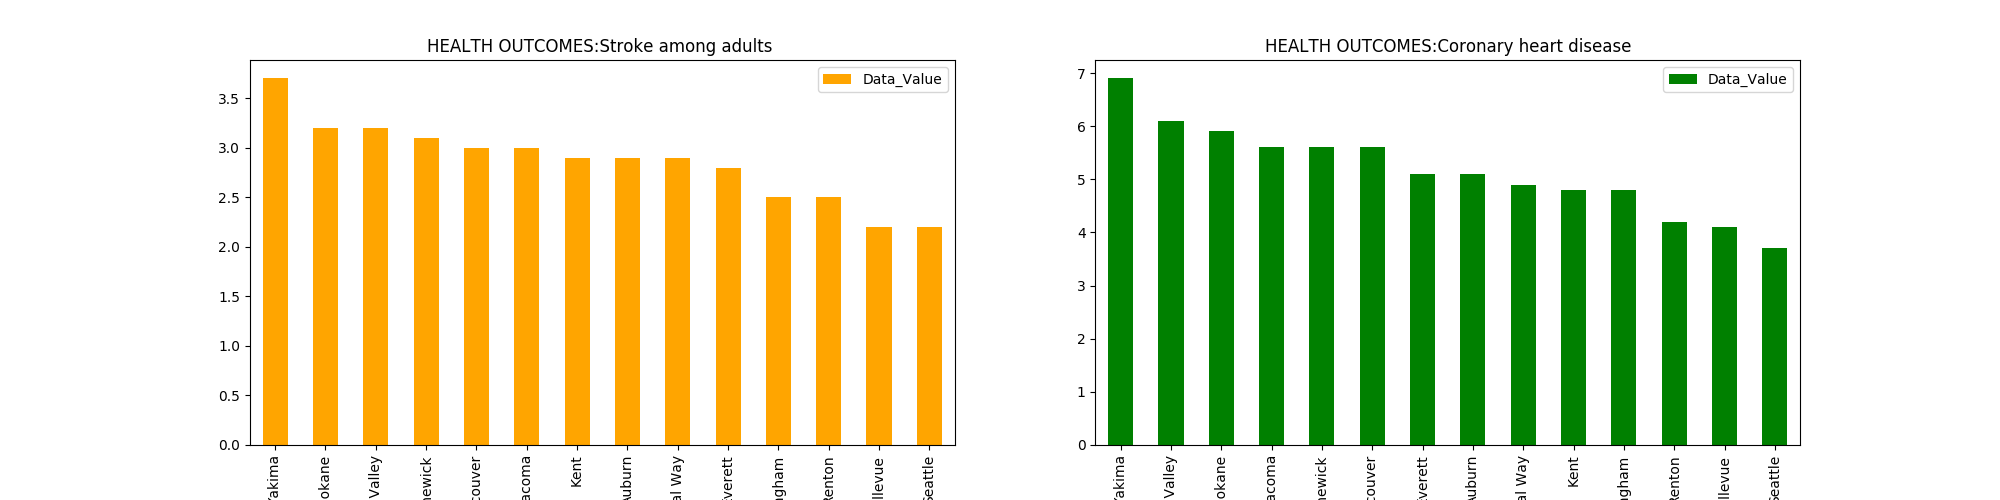

In [38]:
%matplot plt

In [49]:
WA10= spark.sql("select CityName, Measure, Data_Value from WA where \
    Measure = 'High blood pressure among adults aged >=18 Years'and GeographicLevel = 'City' order by Data_Value desc ")
data3=WA10.limit(100).toPandas()
data3

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          CityName                                           Measure  Data_Value
0           Yakima  High blood pressure among adults aged >=18 Years   32.200001
1           Tacoma  High blood pressure among adults aged >=18 Years   31.500000
2          Everett  High blood pressure among adults aged >=18 Years   29.799999
3   Spokane Valley  High blood pressure among adults aged >=18 Years   29.299999
4        Kennewick  High blood pressure among adults aged >=18 Years   29.000000
5        Vancouver  High blood pressure among adults aged >=18 Years   28.900000
6          Spokane  High blood pressure among adults aged >=18 Years   28.400000
7      Federal Way  High blood pressure among adults aged >=18 Years   26.200001
8           Auburn  High blood pressure among adults aged >=18 Years   26.100000
9             Kent  High blood pressure among adults aged >=18 Years   25.600000
10      Bellingham  High blood pressure among adults aged >=18 Years   24.700001
11          Renton  High blo

In [50]:
WA100= spark.sql("select CityName, Measure, Data_Value from WA where \
    Measure = 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years'and GeographicLevel = 'City' order by Data_Value desc ")
WA100.limit(100).toPandas()
data4 = WA100.limit(100).toPandas()
data4

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

          CityName                                                                                   Measure  Data_Value
0        Kennewick  High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years   33.099998
1   Spokane Valley  High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years   32.599998
2        Vancouver  High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years   31.700001
3          Spokane  High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years   31.600000
4           Yakima  High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years   31.600000
5           Tacoma  High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years   31.200001
6          Everett  High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years   29.900000
7           Auburn  High cholest

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

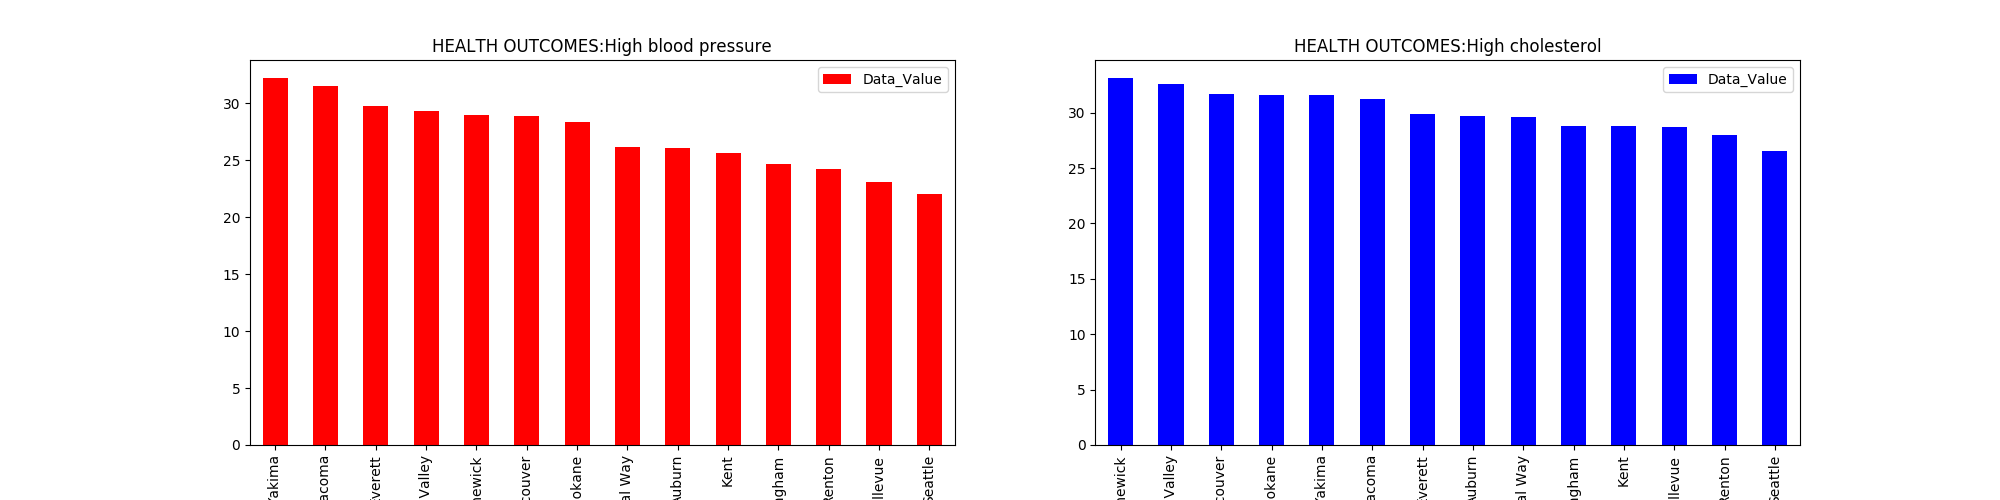

In [51]:

fig, ax = plt.subplots(ncols=2, figsize=(10,5))

#df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
#                [6.4, 3.2, 1], [5.9, 3.0, 2], [7.1, 4.5, 2]],
#                columns=['X', 'Y', 'value'])
data3.plot.bar(title = 'HEALTH OUTCOMES:High blood pressure', x ='CityName', y='Data_Value', figsize=(20, 5), color ='red', ax= ax[0] )
data4.plot.bar(title = 'HEALTH OUTCOMES:High cholesterol', x ='CityName', y='Data_Value', figsize=(20, 5), color ='blue', ax= ax[1])
#df.plot.scatter(x='X', y='Y', c='red', ax=ax[1])
%matplot plt

#### Answer: We found that Yakima consistently has the highest percentages among all heart-related issues with Seattle and Bellevue having the lowest across all heart-related issues

### What are the preventative measures in place?

In [52]:
WA60= spark.sql("select CityName,Measure,Data_Value,Category from WA where \
    Measure = 'Cholesterol screening among adults aged >=18 Years' and GeographicLevel ='City' and \
    Category = 'Prevention' and CityName in ('Bellevue','Seattle','Yakima')order by Data_Value \
      desc")
data5=WA60.limit(14).toPandas()
data5

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   CityName                                             Measure  Data_Value    Category
0  Bellevue  Cholesterol screening among adults aged >=18 Years   81.699997  Prevention
1   Seattle  Cholesterol screening among adults aged >=18 Years   78.000000  Prevention
2    Yakima  Cholesterol screening among adults aged >=18 Years   74.099998  Prevention

In [53]:
WA61= spark.sql("select CityName,Measure,Data_Value,Category from WA where \
    Measure = 'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure' and GeographicLevel ='City' and \
    Category = 'Prevention' and CityName in ('Bellevue','Seattle','Yakima')order by Data_Value \
      desc")
data6=WA61.limit(14).toPandas()
data6

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   CityName                                                                                                Measure  Data_Value    Category
0    Yakima  Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure   70.199997  Prevention
1  Bellevue  Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure   66.000000  Prevention
2   Seattle  Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure   62.500000  Prevention

In [54]:
WA62= spark.sql("select CityName,Measure,Data_Value,Category from WA where \
    Measure = 'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years' and GeographicLevel ='City' and \
    Category = 'Prevention' and CityName in ('Bellevue','Seattle','Yakima')order by Data_Value \
      desc")
data7=WA62.limit(14).toPandas()
data7

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   CityName                                                                                 Measure  Data_Value    Category
0  Bellevue  Visits to doctor for routine checkup within the past Year among adults aged >=18 Years   64.400002  Prevention
1    Yakima  Visits to doctor for routine checkup within the past Year among adults aged >=18 Years   62.099998  Prevention
2   Seattle  Visits to doctor for routine checkup within the past Year among adults aged >=18 Years   61.900002  Prevention

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

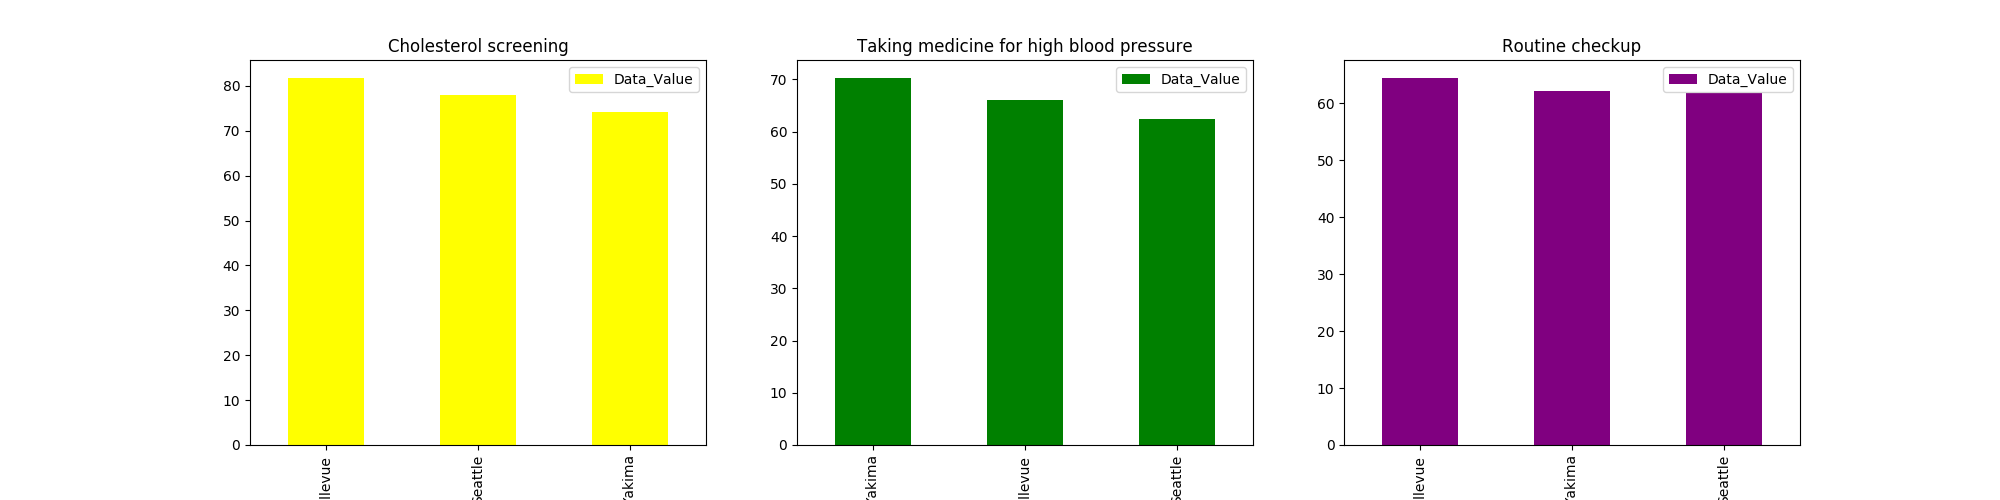

In [55]:
fig1, ax1 = plt.subplots(ncols=3, figsize=(13,10))

data5.plot.bar(title = 'Cholesterol screening', x ='CityName', y='Data_Value', figsize=(20, 5), color ='yellow', ax= ax1[0] )
data6.plot.bar(title = 'Taking medicine for high blood pressure', x ='CityName', y='Data_Value', figsize=(20, 5), color ='green', ax= ax1[1])
data7.plot.bar(title = 'Routine checkup', x ='CityName', y='Data_Value', figsize=(20, 5), color ='purple', ax= ax1[2])
%matplot plt

### Answer: We found that in all three cities, there is no significant amount of disparity in taking the prevention measures. For example, most of the participants in all three cities were taking blood pressure medication, regularly visiting the doctor, and also getting screened for cholesterol.

## Are there unhealthy behaviors that contribute to these measures for each city?

In [56]:
WA6= spark.sql("select CityName,Measure,Data_Value,Category from WA where \
    Measure = 'Obesity among adults aged >=18 Years' and GeographicLevel ='City' and \
    CityName in ('Bellevue','Seattle','Yakima')order by Data_Value \
      desc")
data8=WA6.limit(14).toPandas()
data8

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   CityName                               Measure  Data_Value             Category
0    Yakima  Obesity among adults aged >=18 Years   36.799999  Unhealthy Behaviors
1   Seattle  Obesity among adults aged >=18 Years   20.799999  Unhealthy Behaviors
2  Bellevue  Obesity among adults aged >=18 Years   18.000000  Unhealthy Behaviors

In [57]:

WA3= spark.sql("select CityName,Measure,Data_Value,Category from WA where \
    Measure = 'Current smoking among adults aged >=18 Years' and GeographicLevel ='City' and \
    CityName in ('Bellevue','Seattle','Yakima')order by Data_Value \
      desc")
data9=WA3.limit(14).toPandas()
data9

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   CityName                                       Measure  Data_Value             Category
0    Yakima  Current smoking among adults aged >=18 Years        17.9  Unhealthy Behaviors
1   Seattle  Current smoking among adults aged >=18 Years        10.2  Unhealthy Behaviors
2  Bellevue  Current smoking among adults aged >=18 Years         8.4  Unhealthy Behaviors

In [58]:
WA5= spark.sql("select CityName,Measure,Data_Value,Category from WA where \
    Measure = 'No leisure-time physical activity among adults aged >=18 Years' and GeographicLevel ='City' and \
    CityName in ('Bellevue','Seattle','Yakima')order by Data_Value \
      desc")
data10=WA5.limit(14).toPandas()
data10

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   CityName                                                         Measure  Data_Value             Category
0    Yakima  No leisure-time physical activity among adults aged >=18 Years        28.5  Unhealthy Behaviors
1   Seattle  No leisure-time physical activity among adults aged >=18 Years        14.3  Unhealthy Behaviors
2  Bellevue  No leisure-time physical activity among adults aged >=18 Years        13.6  Unhealthy Behaviors

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

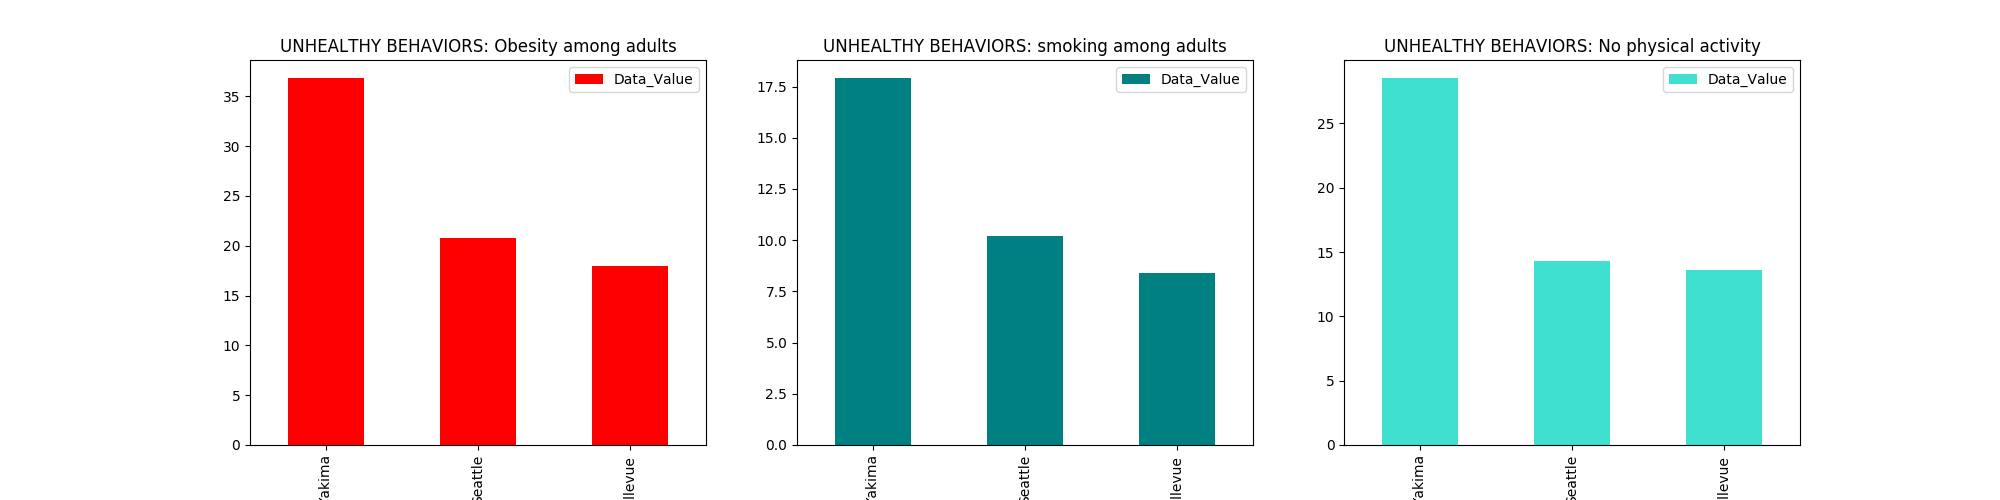

In [59]:
fig3, ax3 = plt.subplots(ncols=3, figsize=(13,10))
data8.plot.bar(title = 'UNHEALTHY BEHAVIORS: Obesity among adults', x ='CityName', y='Data_Value', figsize=(20, 5), color ='red', ax= ax3[0] )
data9.plot.bar(title = 'UNHEALTHY BEHAVIORS: smoking among adults', x ='CityName', y='Data_Value', figsize=(20, 5), color ='teal', ax= ax3[1])
data10.plot.bar(title = 'UNHEALTHY BEHAVIORS: No physical activity', x ='CityName', y='Data_Value', figsize=(20, 5), color ='turquoise', ax= ax3[2])
%matplot plt

### Answer: As compared to the preventative measures, the unhealthy behaviors show a drastic difference betweent the cities. This means that despite going to the doctor, taking medicine, and cholesterol screening, the residents in Yakima are still largely unhealthier because they indulge in too many unhealthy behaviors.

## Is this based on population?

In [60]:
WA7= spark.sql("select CityName,PopulationCount from WA where \
    Measure = 'Obesity among adults aged >=18 Years' and GeographicLevel ='City'and \
    CityName in ('Bellevue','Seattle','Yakima') order by PopulationCount \
      desc")
data11=WA7.limit(14).toPandas()
data11

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   CityName  PopulationCount
0   Seattle           608660
1  Bellevue           122363
2    Yakima            91067

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

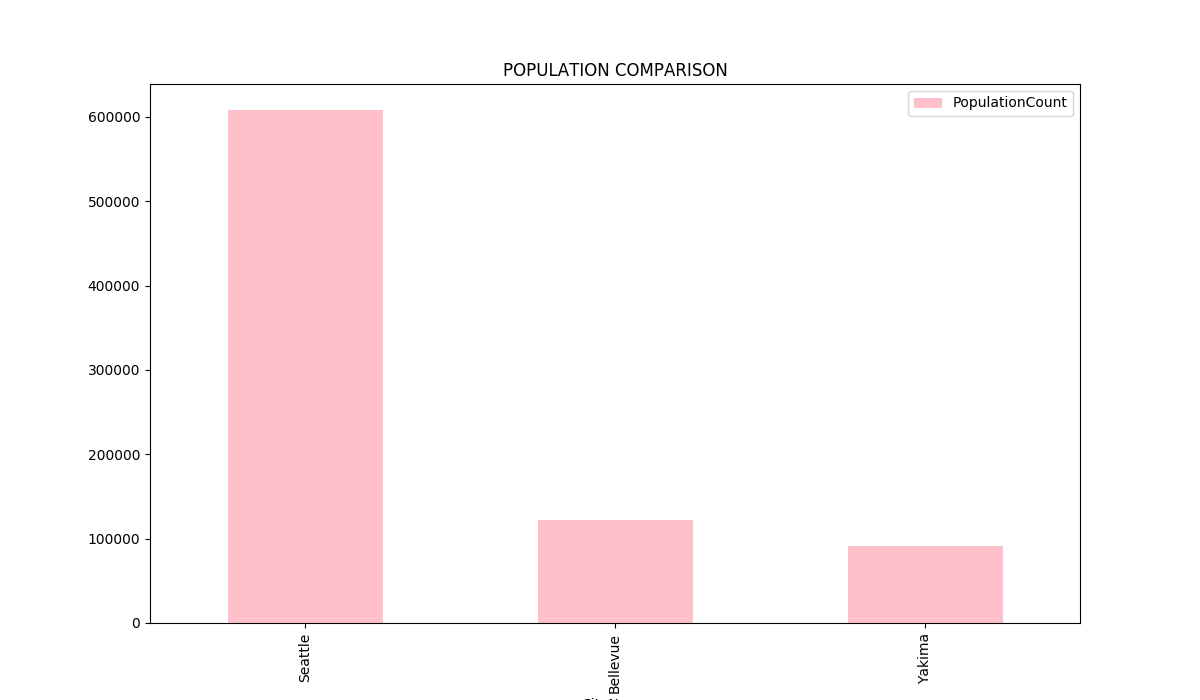

In [61]:
data11.plot.bar(title = 'POPULATION COMPARISON', x ='CityName', y='PopulationCount', figsize=(12,7), color ='pink')
%matplot plt


### Answer: There is no obvious correlation based on the population sizes for each city. For example, Spokane is densely populated despite being far away from large urban centers like Seattle and Bellevue.

### Is this a regional trend across the US?

In [64]:

resTX = spark.sql("select  Year,StateAbbr,StateDesc,CityName,GeographicLevel,Category, \
        Measure,Data_Value,PopulationCount,CategoryID,MeasureId,Short_Question_Text \
        from Viewone where Year = '2017'  and DataValueTypeID = 'CrdPrv' and StateAbbr='TX' ")


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
resTX.createOrReplaceTempView("TXview")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [67]:
ressTX = spark.sql("select CityName,Category,\
                 Measure,Data_Value,PopulationCount \
                 from TXview where CityName in ('Pharr','Dallas')  and Category ='Health Outcomes' and \
                 Measure in ('Coronary heart disease among adults aged >=18 Years',\
                 'High blood pressure among adults aged >=18 Years',\
                'Stroke among adults aged >=18 Years') and GeographicLevel ='City' order by Measure")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
ressTX.limit(100).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  CityName         Category                                              Measure  Data_Value  PopulationCount
0    Pharr  Health Outcomes  Coronary heart disease among adults aged >=18 Years    6.700000            70400
1   Dallas  Health Outcomes  Coronary heart disease among adults aged >=18 Years    5.400000          1197816
2   Dallas  Health Outcomes     High blood pressure among adults aged >=18 Years   32.599998          1197816
3    Pharr  Health Outcomes     High blood pressure among adults aged >=18 Years   32.900002            70400
4   Dallas  Health Outcomes                  Stroke among adults aged >=18 Years    3.200000          1197816
5    Pharr  Health Outcomes                  Stroke among adults aged >=18 Years    3.400000            70400

### Answer: The trend is not the same across the US. As we see in the example above from Texas, the large urban area such as Dallas is overall unhealthier than the smaller area of Austin. This shows that the governments emphasize different priorities within each state. So states like Texas should try to create more health awareness in larger areas such as Dallas.